In [2]:
import gensim.downloader as api
from nltk.corpus import stopwords
import string
import re
from argostranslate import package, translate
import numpy as np

In [195]:
import sys
sys.path

['/home/ilya/gensim-data',
 '/mnt/c/Users/Mitbu/PycharmProjects/sem6',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/ilya/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/ilya/.local/lib/python3.8/site-packages/IPython/extensions',
 '/home/ilya/.ipython']

# LIST OF WORDS

In [3]:
model = api.load('word2vec-google-news-300')

In [4]:
stop = stopwords.words('english')

In [5]:
stop = set(map(lambda x: x.lower(), stop))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
punct = re.compile(f'[^a-z\'_-]')

In [7]:
def is_word_correct(word):
    return word not in stop and punct.search(word) is None

In [8]:
def getSameWord(vec, max=10, similarity=0.5):
    res = model.similar_by_vector(vec, topn=max)
    for w in res:
        word = w[0].lower()
        if w[1] < similarity:
            continue
        if is_word_correct(word):
            yield word.replace('_', ' ')

In [9]:
# list(getSameWord('gnostic', max=100))

In [10]:
def is_known(word):
    return False
def is_interesting(word):
    return True

In [11]:
def predict_by_word(word, max=100):
    if word in model.wv:
        vec = model.wv[word]
        return predict_by_vec(vec, max=max)

In [12]:
def predict_by_vec(vec, max=100):
    return [w for w in getSameWord(vec, max=max) if not is_known(w) and is_interesting(w)]

In [13]:
test=model.wv['graph']

<ipython-input-13-7020811dd9fa>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  test=model.wv['graph']


In [14]:
'google' in model.wv

<ipython-input-14-16859e009823>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  'google' in model.wv


True

In [15]:
# predict_by_word('technology')

In [16]:
test='google'

# TRANSLATE

In [17]:
package.install_from_path('translate-en_ru-1_1.argosmodel')

In [18]:
[str(s) for s in translate.get_installed_languages()]

['English', 'Russian']

In [19]:
installed_languages = translate.get_installed_languages()

In [20]:
translation_en_ru = installed_languages[0].get_translation(installed_languages[1])

In [21]:
translation_en_ru.translate("hello word")

'привет слово'

# VOCAB

In [22]:
vocab = [k for k in model.wv.vocab if is_word_correct(k)]

<ipython-input-22-d75e84cb4dc8>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocab = [k for k in model.wv.vocab if is_word_correct(k)]


In [23]:
vocab

['said',
 'year',
 'one',
 'would',
 'also',
 'two',
 'first',
 'time',
 'last',
 'new',
 'people',
 'could',
 'years',
 'three',
 'million',
 'like',
 'percent',
 'get',
 'game',
 'back',
 'company',
 'team',
 'made',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'week',
 'government',
 'home',
 'going',
 'good',
 "'re",
 'many',
 'way',
 'four',
 'may',
 'since',
 'work',
 'take',
 'including',
 'high',
 'next',
 'much',
 'still',
 'go',
 'think',
 'old',
 'even',
 'world',
 'see',
 'say',
 'business',
 'five',
 'told',
 'us',
 'right',
 'play',
 'help',
 'market',
 'know',
 'end',
 'long',
 'information',
 'points',
 'part',
 'around',
 'police',
 'want',
 "'ve",
 'based',
 'got',
 'third',
 'school',
 'left',
 'another',
 'country',
 'need',
 'best',
 'win',
 'quarter',
 'use',
 'today',
 'public',
 'run',
 'set',
 'month',
 'top',
 'billion',
 'come',
 'city',
 'place',
 'night',
 'six',
 'group',
 'really',
 'found',
 'used',
 'lot',
 "'m",
 'money',
 'put',

In [24]:
len(vocab)

425881

In [26]:
user_knowledge = np.full((len(vocab),), False, dtype=bool)

In [29]:
vocab_dict = {
    w: i
    for i, w in enumerate(vocab)
}

In [30]:
vocab_dict

{'said': 0,
 'year': 1,
 'one': 2,
 'would': 3,
 'also': 4,
 'two': 5,
 'first': 6,
 'time': 7,
 'last': 8,
 'new': 9,
 'people': 10,
 'could': 11,
 'years': 12,
 'three': 13,
 'million': 14,
 'like': 15,
 'percent': 16,
 'get': 17,
 'game': 18,
 'back': 19,
 'company': 20,
 'team': 21,
 'made': 22,
 'make': 23,
 'second': 24,
 'state': 25,
 'well': 26,
 'day': 27,
 'season': 28,
 'says': 29,
 'week': 30,
 'government': 31,
 'home': 32,
 'going': 33,
 'good': 34,
 "'re": 35,
 'many': 36,
 'way': 37,
 'four': 38,
 'may': 39,
 'since': 40,
 'work': 41,
 'take': 42,
 'including': 43,
 'high': 44,
 'next': 45,
 'much': 46,
 'still': 47,
 'go': 48,
 'think': 49,
 'old': 50,
 'even': 51,
 'world': 52,
 'see': 53,
 'say': 54,
 'business': 55,
 'five': 56,
 'told': 57,
 'us': 58,
 'right': 59,
 'play': 60,
 'help': 61,
 'market': 62,
 'know': 63,
 'end': 64,
 'long': 65,
 'information': 66,
 'points': 67,
 'part': 68,
 'around': 69,
 'police': 70,
 'want': 71,
 "'ve": 72,
 'based': 73,
 'got':

In [34]:
def learn_word(user_knowledge, word):
    if word not in vocab_dict:
        raise 'Undefined word'
    user_knowledge[vocab_dict[word]] = True
    return user_knowledge

def get_known_words(user_knowledge):
    idx = user_knowledge.nonzero()
    return [vocab[i] for i in idx[0]]

In [35]:
user_knowledge = learn_word(user_knowledge, 'paste')

In [36]:
get_known_words(user_knowledge)

['paste']

In [37]:
# теперь необходимо обучить 2 модели:
# 1) предсказывает по реально изученным словам, значет ли юзер новое слово
# (или сразу предсказывает вектор предположительно изученных слов)
# 2) по статистеке о юзере предсказывает, будт ли ему интересно данное слово

# User words preprocessing

In [38]:
# https://study-english.info/vocabularies.php

In [39]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ilya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
with open(r'words/raw/Лексика по теме Выборы.txt') as f:
    print(f.read())

English term
Транскрипция
Русское название
absentee voter	[ ˌæbsənˈtiː ˈvəʊtə ]	избиратель, голосующий заочно
absentee voting	[ ˌæbsənˈtiː ˈvəʊtɪŋ ]	заочное голосование
absentee voting certificate	[ ˌæbsənˈtiː ˈvəʊtɪŋ səˈtɪfɪkeɪt ]	открепительное удостоверение для голосования
absolute majority	[ ˈæbsəluːt məˈdʒɒrɪti ]	абсолютное большинство
access to media	[ ˈækses tə ˈmiːdɪə ]	доступ к СМИ
accountability	[ əˌkaʊntəˈbɪləti ]	подотчетность
accreditation	[ əˌkredɪˈteɪʃən ]	аккредитация
accredited agent (of a candidate)	[ əˈkredɪtɪd ˈeɪdʒənt əv ə ˈkændɪdət ]	аккредитованное доверенное лицо (кандидата)
adjudication of grievances	[ əˌdʒuːdɪˈkeɪtʃən əv ˈɡriːvnsɪz ]	рассмотрение жалоб
administrative and territorial division of a subject of the Russian Federation	[ ədˈmɪnɪstrətɪv ənd ˌterɪˈtɔːrɪəl dɪˈvɪʒən əv ə sʌbˈdʒekt əv ðə ˈrʌʃən ˌfedəˈreɪʃən ]	административно-территориальное устройство субъекта Российской Федерации
administrative liability for infringing upon electoral rights of citizens 

In [41]:
res = []
with open(r'words/raw/Лексика по теме Выборы.txt') as f:
    for line in f.read().split('\n'):
        line = line.split('\t')
        if len(line) == 3:
            for w in word_tokenize(line[0]):
                if is_word_correct(w):
                    res.append(w)

In [42]:
res_set = set(res)
len(res), len(res_set)

(901, 377)

In [43]:
word_tokenize('autonomous district / okrug (Russia)pate in a referendum')

['autonomous',
 'district',
 '/',
 'okrug',
 '(',
 'Russia',
 ')',
 'pate',
 'in',
 'a',
 'referendum']

In [44]:
def filter_file(path, en_col, total_col):
    with open(path) as f:
        for line in f.read().split('\n'):
            line = line.split('\t')
            if len(line) == total_col:
                for w in word_tokenize(line[en_col-1]):
                    if is_word_correct(w.lower()):
                        yield w.lower()

In [45]:
def create_dict(path, data):
    with open(path, 'w') as f:
        first_line = True
        for w in data:
            if first_line:
                first_line = False
                f.write(w.lower())
            else:
                f.write('\n' + w.lower())

In [46]:
files = [
('Американский сленг.txt', 1, 2),
('Английские идиомы с переводом и примерами.txt', 1, 3),
('Английские пословицы и поговорки.txt', 1, 2),
('Английские разговорные словосочетания и выражения.txt', 1, 2),
('Английский сленг.txt', 1, 2),
('Глаголы для описания приготовления пищи.txt', 1, 2),
('Лексика по теме Автомобиль.txt', 1, 3),
('Лексика по теме Анатомия.txt', 1, 3),
('Лексика по теме Археология.txt', 2, 3),
('Лексика по теме Архитектура.txt', 2, 3),
('Лексика по теме Аэропорт.txt', 1, 3),
('Лексика по теме Внешность.txt', 1, 3),
('Лексика по теме Выборы.txt', 1, 3),
('Лексика по теме Город.txt', 2, 3),
('Лексика по теме Гостиница.txt', 1, 2),
('Лексика по теме Грамматика.txt', 2, 2),
('Лексика по теме Деревья.txt', 2, 2),
('Лексика по теме Дом.txt', 1, 3),
('Лексика по теме Еда.txt', 2, 2),
('Лексика по теме Животные.txt', 1, 3),
('Лексика по теме Здоровье, части тела.txt', 2, 3),
('Лексика по теме Имущество.txt', 1, 2),
('Лексика по теме Искусство.txt', 1, 2),
('Лексика по теме Карты (игральные).txt', 1, 3),
('Лексика по теме Карьера.txt', 1, 2),
('Лексика по теме Кино.txt', 1, 2),
('Лексика по теме Компьютер.txt', 1, 2),
('Лексика по теме Кустарники.txt', 2, 2),
('Лексика по теме Магазины.txt', 2, 2),
('Лексика по теме Мебель.txt', 2, 2),
('Лексика по теме Медицина.txt', 1, 2),
('Лексика по теме Мобильный телефон.txt', 1, 2), ##
('Лексика по теме Музыка.txt', 1, 3),
('Лексика по теме Насекомые.txt', 2, 2),
('Лексика по теме Одежда.txt', 1, 3),
('Лексика по теме Олимпийские виды спорта.txt', 1, 3),
('Лексика по теме Профессии.txt', 1, 2),
('Лексика по теме Птицы.txt', 2, 3),
('Лексика по теме Путешествие.txt', 2, 2),
('Лексика по теме Рыбы.txt', 1, 2),
('Лексика по теме Семья и родственники.txt', 2, 3),
('Лексика по теме Спорт.txt', 1, 2),
('Лексика по теме Строительство.txt', 2, 2),
('Лексика по теме Футбол.txt', 2, 2),
('Лексика по теме Характер.txt', 2, 3),
('Лексика по теме Химия.txt', 2, 3),
('Лексика по теме Хобби.txt', 1, 2),
('Лексика по теме Хоккей.txt', 2, 2),
('Лексика по теме Художественные промыслы.txt', 2, 2),
('Лексика по теме Цвета.txt', 1, 3),
('Лексика по теме Шахматы.txt', 1, 3),
('Лексика по теме Экология.txt', 1, 2),
('Лексика по теме Экономика.txt', 2, 3)
]

In [47]:
for f in files:
    data = set(filter_file(f'words/raw/{f[0]}', f[1], f[2]))
    create_dict(f'words/dict/{f[0]}', data)

# Create user class

In [48]:
import random
import math

In [49]:
class User:
    # интерес - список интересов те числ от 0 до 1, часть слов, которые знает юзер
    def __init__(self, intresting, intr_param=0.5):
        self.words_known = set()
        self.words_intresting = set()
        for i, intr in enumerate(intresting):
            with open(f'words/dict/{files[i][0]}') as f:
                data = f.read().split('\n')
                # все данные из файла с интересной темой кладем в words_intresting
                if intr >= intr_param:
                    for word in data:
                        self.words_intresting.add(word)
                # для каждой темы кладем пропорционально интересу слов в words_known
                for word in random.choices(data, k=math.floor(intr * len(data))):
                    self.words_known.add(word)
    def is_intersting(self, word):
        return word in self.words_intresting
    def is_known(self, word):
        return word in self.words_known

In [50]:
u = User([0.5] * len(files))

In [51]:
u.is_intersting('fist')

True

# Получаем список всех слов

In [52]:
u = User([1] * len(files))

In [53]:
not_in_wv = 0
for w in u.words_known:
    if w not in model.wv:
        not_in_wv += 1
        print(w)

fringebarbel
chequebook
everglade
ncm
heath-cock
search-program
attorney-general
in-kind
comoro
marmorata
centre
self-financing
high-sticking
daughter-in-law
off-site
neighbour
epinorth
break-even
latvia
life-asserting
semi-final
castagnola
art-worker
button-through
line-up
gatto
fruit-and-eggwhite
country-house
sea-scapes
guarmi
frontosa
half-lengh
antimycotic
tri-band
blackmahseer
pastillage
bright-red
wallago
diarrhoea
clay-coloured
lenok
dfa-tp
promed-mail
red-handed
brahms
synodon
piss-head
case-fatality
vice-
osier
fuzzbuster
haemoglobin
siganus
neo-renaissance
follow-up
washing-up
payara
ascariasis
'mauntin
hapuka
langlauf
screw-up
rinho
longfinned
-storeyed
hausen
one-timer
great-grandparents
deep-set
avant-garde
archaeology
cut-and-dried
pneumocystosis
pdr
wfs
uranoscopo
glass-cutter
three-leaved
decorativeness
man-eater
colibacillosis
mudminnow
-hand
co-operation
rosefish
gear-change
sky-scraper
castagna
finnock
neo-classicists
deoxyribonucleic
eruca
self-taught
offence
horse

<ipython-input-53-0950fed65ff3>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w not in model.wv:


In [54]:
not_in_wv / len(u.words_known)

0.1152073732718894

In [55]:
# create train data

In [56]:
u1 = User([random.uniform(0,1) for i in files], intr_param=0.5)

In [57]:
known = [] # мы знаем о том, что юзер знает эти слова
total = u.words_known # ограничиваем список всех слов (для теста)
already_known = [] # слова, которые мы порекомендовали, но юзер их уже знал
interests = [] # слова, которые мы порекомендовали и юзеру они оказались интересны (включая уже известные)
total_pred = [] # все предсказанные слова

In [58]:
k=200
for w in random.choices(list(u1.words_known), k=k):
    known.append(w)

In [59]:
for i, w in enumerate(known):
    print(str((i+1)/k) + '\t', end='\r')
    pred = predict_by_word(w, max=1000)
    if pred is None:
        pred = []
    for pw in pred:
        if pw in total:
            total_pred.append(pw)
            if u1.is_intersting(pw):
                interests.append(pw)
            if u1.is_known(pw):
                already_known.append(pw)

<ipython-input-11-bac5167a71f0>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if word in model.wv:
<ipython-input-11-bac5167a71f0>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vec = model.wv[word]


In [60]:
len(total_pred)

1079

In [61]:
len(interests)

868

In [62]:
len(already_known)

712

In [63]:
len(u1.words_known)

3969

In [64]:
# те мы можем достаточно хорошо предсказывать слова, которые интеречсны пользователю,
# однако большинство из этих слов он уже знает (хотя нам об этом неизвестно)
# возможное решение - рекомендовать слова по уровню пользователя (модель предсказывает, знает ли юзер это слово)
# данные результат зависит от значение User.intr_param

In [65]:
len(interests) / len(total_pred)

0.8044485634847081

In [66]:
len(already_known) / len(total_pred)

0.659870250231696

In [67]:
len(already_known) / len(interests)

0.8202764976958525

# Обучаем модель1 (знает ли юзер новое слово)

In [68]:
# на каждого юзера свои модель => она должна быть компактной, быстрой, работать намеленьких данных
# необходимо юзать батчи и пр. методы расширения информации на малой выборке (понижать размерность эмбединга слова)

In [69]:
u2 = User([random.uniform(0,1) for i in files], intr_param=0.5)

In [70]:
# слова, полученные в результате тестирования
test = []

In [71]:
k=500
for w in random.choices(list(total), k=k):
    test.append((w, u2.is_known(w)))

In [72]:
train = {'vec': [], 'ans': []}

In [73]:
for (w, kn) in test:
    if w in model.wv:
        train['vec'].append(model.wv[w])
        train['ans'].append(int(kn))

<ipython-input-73-f2f52030c32d>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv:
<ipython-input-73-f2f52030c32d>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  train['vec'].append(model.wv[w])


In [74]:
x_t = pd.DataFrame(train['vec'])

In [75]:
y_t = pd.DataFrame(train['ans'])

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)

In [78]:
knn.fit(x_t, y_t)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [79]:
knn.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier()>

In [80]:
data = []
for w in list(total):
    data.append((w, u2.is_known(w)))

In [81]:
test_data = {'vec': [], 'ans': []}

In [82]:
for (w, kn) in data:
    if w in model.wv and (w, kn) not in test:
        test_data['vec'].append(model.wv[w])
        test_data['ans'].append(int(kn))

<ipython-input-82-2ee88408c533>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv and (w, kn) not in test:
<ipython-input-82-2ee88408c533>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  test_data['vec'].append(model.wv[w])


In [83]:
x = pd.DataFrame(test_data['vec'])
y = pd.DataFrame(test_data['ans'])

In [84]:
y['pred'] = knn.predict(x)

In [85]:
y[y['pred']==1]

0  pred
3     0     1
5     0     1
7     1     1
8     1     1
9     1     1
...  ..   ...
4560  0     1
4561  0     1
4562  1     1
4563  1     1
4566  0     1

[1726 rows x 2 columns]

In [86]:
from sklearn.metrics import f1_score

In [87]:
f1_score(y[0], y['pred'])

0.4868202327238185

In [88]:
len(test_data['ans']), len(test), len(total)

(4567, 500, 5642)

In [89]:
f1_score([random.randint(0,1) for i in range(10**5)], [random.randint(0,1) for i in range(10**5)])

0.49868235152656837

# попробуем снизить размерность

In [90]:
from sklearn.decomposition import PCA as sklearnPCA

In [91]:
comp=5
sklearn_pca = sklearnPCA(n_components=comp)
pca_tfidf_sklearn = sklearn_pca.fit(x_t)

In [92]:
pca_tfidf_sklearn.transform(x)

array([[ 0.39586705,  0.19268636, -0.16190369, -0.01220952,  0.83822066],
       [ 0.2647237 , -0.19455863,  0.07317117, -0.10164317,  0.44856445],
       [-0.41776433,  0.22914995, -0.15713282, -0.20386335, -0.38609175],
       ...,
       [ 0.94438893,  0.48186914, -0.2123007 ,  0.43452364,  0.76192627],
       [ 0.46114704, -0.36902794, -0.37269029,  1.29625186, -0.46616174],
       [-0.67285096, -0.00915302, -0.08874641,  0.16125121,  0.32779493]])

In [93]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(pca_tfidf_sklearn.transform(x_t), y_t)
y['pred_transformed'] = knn.predict(pca_tfidf_sklearn.transform(x))

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [94]:
f1_score(y[0], y['pred_transformed'])

0.3680518078791149

In [95]:
tmp=list(pca_tfidf_sklearn.transform(x))

In [96]:
import matplotlib.pyplot as plt

In [97]:
x1 = pca_tfidf_sklearn.transform(x)
# ps. можно нарисовать график результата кластреизации. Обучение на базовых словах, на графике все (понижаем размерность до 2)

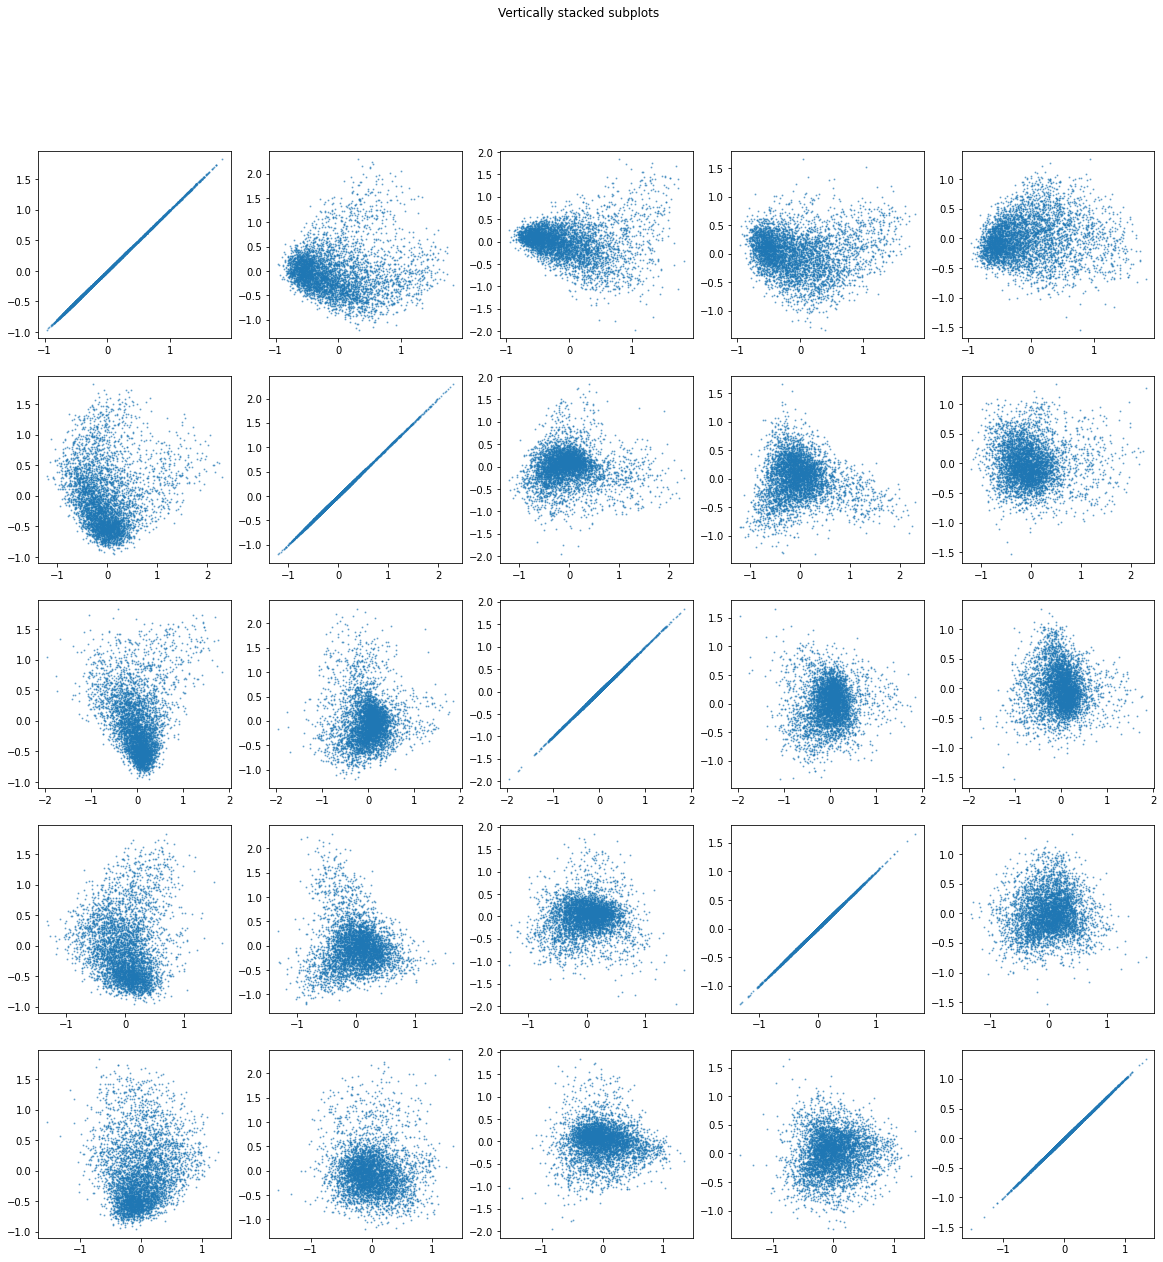

In [98]:
fig, axs = plt.subplots(comp, comp)
fig.set_figheight(20)
fig.set_figwidth(20)
for i in range(comp):
    for j in range(comp):
        axs[i, j].scatter(x1[:, i], x1[:, j], alpha=0.5, s=1)

# Предположим, что знание юзером слова зависит от его скила в предметной области. Чем дальше слово в списке, тем оно проще

In [99]:
import numpy as np

In [100]:
class UserUpd:
    # интерес - список интересов те числ от 0 до 1, часть слов, которые знает юзер
    def __init__(self, intresting, intr_param=0.5):
        self.words_known = set()
        self.words_intresting = set()
        for i, intr in enumerate(intresting):
            with open(f'words/dict/{files[i][0]}') as f:
                data = f.read().split('\n')
                # все данные из файла с интересной темой кладем в words_intresting
                if intr >= intr_param:
                    for word in data:
                        self.words_intresting.add(word)
                # для каждой темы кладем пропорционально интересу слов в words_known,
                # распределение задается удаленностьбю от начала
                # те чем ближе к началу списка слово, тем оно проще
                p = np.array([j / len(data) for j in range(len(data))])
                p = [p_i / p.sum() for p_i in p]
                for word in np.random.choice(data, size=10**5, p=p):
                    self.words_known.add(word)
    def is_intersting(self, word):
        return word in self.words_intresting
    def is_known(self, word):
        return word in self.words_known

In [101]:
# рисуем гистограмму распределения при новой генерации
with open(f'words/dict/{files[0][0]}') as f:
    data = f.read().split('\n')
    p = np.array([j / len(data) for j in range(len(data))])
    p_sum = p.sum()
    p = [p_i / p_sum for p_i in p]
    res = np.random.choice(len(data), size=10**5, p=p)

In [102]:
unique, counts = np.unique(res, return_counts=True)

<BarContainer object of 135 artists>

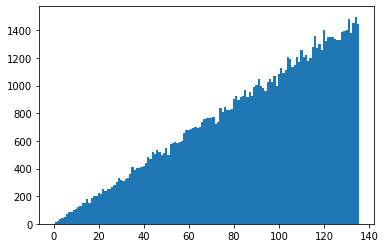

In [103]:
plt.bar(unique, counts, width=1) # можно показать различные приближения size

In [160]:
u2 = User([1] * 10 + [0] * (len(files) - 10), intr_param=0.8)
test = []
k=5000
for w in random.choices(list(total), k=k):
    test.append((w, u2.is_known(w)))

train = {'vec': [], 'ans': []}
for (w, kn) in test:
    if w in model.wv:
        train['vec'].append(model.wv[w])
        train['ans'].append(int(kn))
x_t = pd.DataFrame(train['vec'])
y_t = pd.DataFrame(train['ans'])

data = []
orig_words = []
for w in list(total):
    data.append((w, u2.is_known(w)))
test_data = {'vec': [], 'ans': []}
for (w, kn) in data:
    if w in model.wv and (w, kn) not in test:
        test_data['vec'].append(model.wv[w])
        orig_words.append(w)
        test_data['ans'].append(int(kn))
x = pd.DataFrame(test_data['vec'])
y = pd.DataFrame(test_data['ans'])

<ipython-input-160-72a6eebd14ab>:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv:
<ipython-input-160-72a6eebd14ab>:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  train['vec'].append(model.wv[w])
<ipython-input-160-72a6eebd14ab>:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv and (w, kn) not in test:
<ipython-input-160-72a6eebd14ab>:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  test_data['vec'].append(model.wv[w])


In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_t, y_t)
y['pred'] = knn.predict(x)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [113]:
f1_score(y[0], y['pred'])

0.2777777777777778

In [188]:
comp=10  # покозать, что кластерная структура плохо прослеживается дляжи по =20
sklearn_pca = sklearnPCA(n_components=comp)
pca_tfidf_sklearn = sklearn_pca.fit(x_t)

In [189]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(pca_tfidf_sklearn.transform(x_t), y_t)
y['pred_transformed'] = knn.predict(pca_tfidf_sklearn.transform(x))

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [190]:
f1_score(y[0], y['pred_transformed'])

0.332892998678996

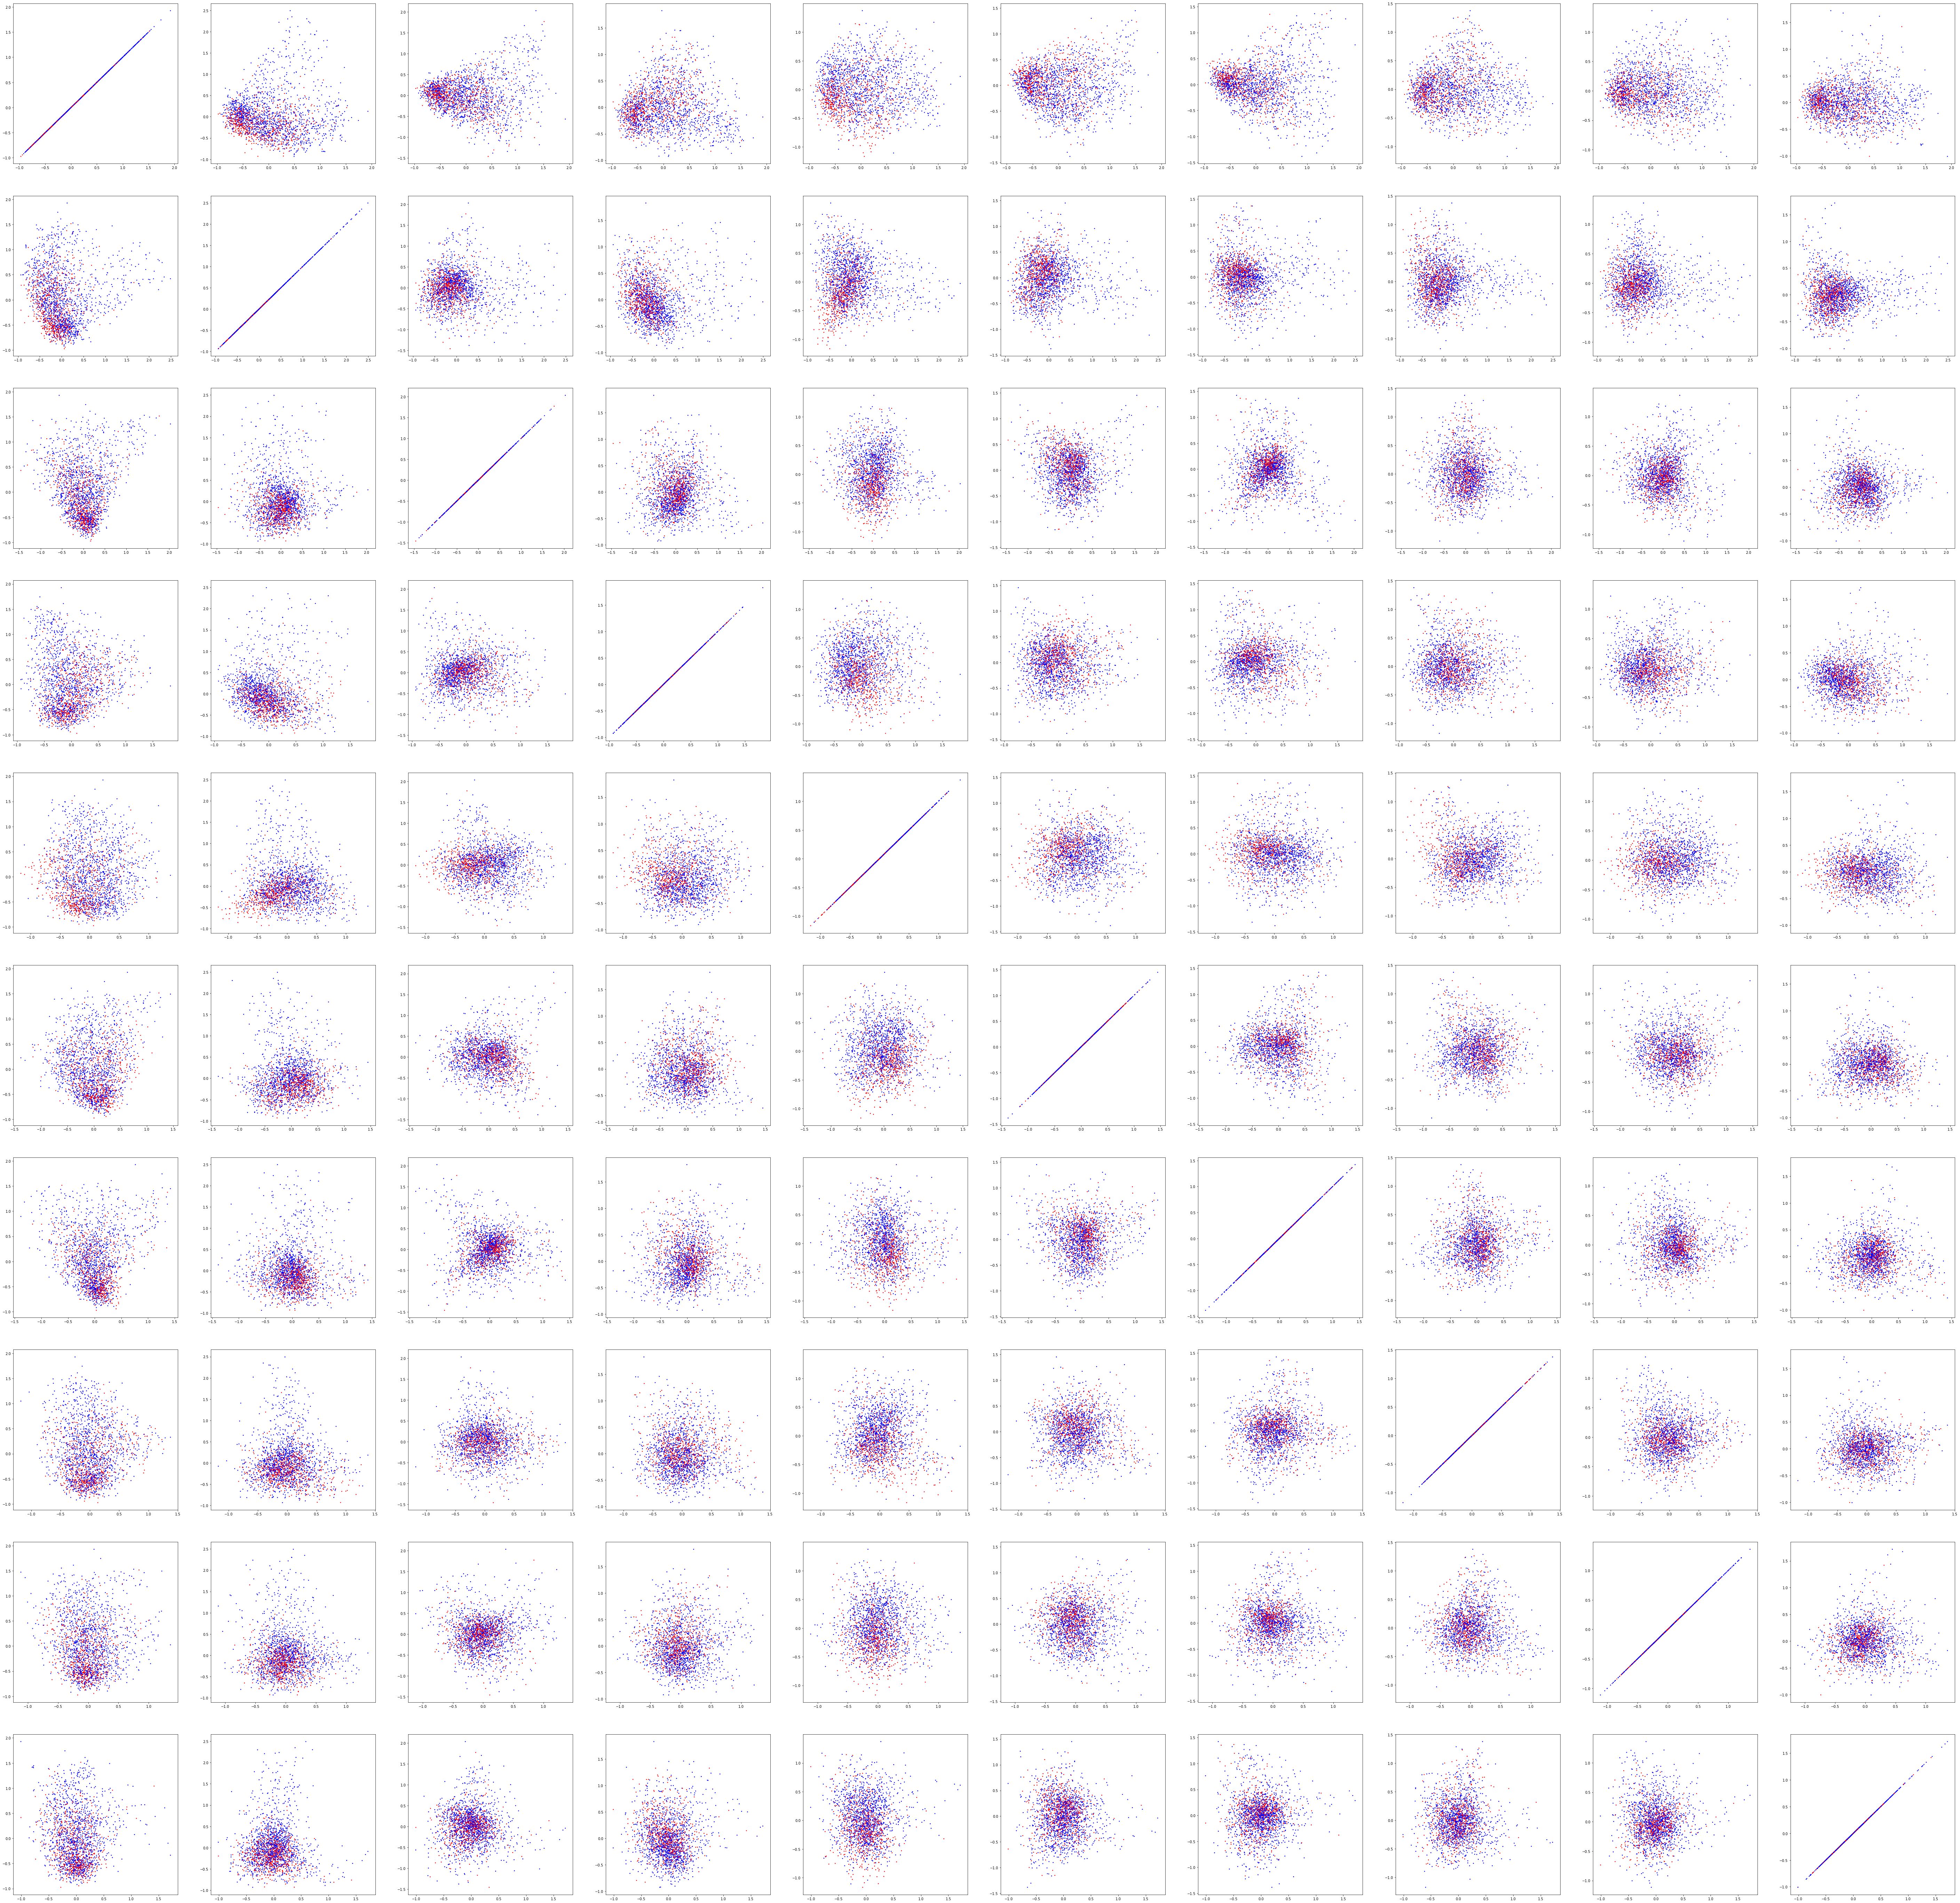

In [194]:
tmp=list(pca_tfidf_sklearn.transform(x))
x1 = pca_tfidf_sklearn.transform(x)
fig, axs = plt.subplots(comp, comp)
fig.set_figheight(100)
fig.set_figwidth(100)
for i in range(comp):
    for j in range(comp):
        col = np.where(np.array([u2.is_intersting(w) for w in orig_words]), 'red', 'blue')
        axs[i, j].scatter(x1[:, i], x1[:, j], alpha=1, s=3, c=col)